# INGENIERÍA DE DATOS PARA LOGS

El proceso a realizar es el siguiente:
1. Imputación de datos
2. Tratamiento de outliers
3. Análisis descriptivo
4. Transformación y escalamiento de atributos

In [15]:
import pandas as pd

logs_entrenamiento = pd.read_csv('logs_entrenamiento.csv')


In [16]:
# Configuración de pandas
pd.set_option('display.max_columns', None)

In [17]:
logs_entrenamiento.head()

,Unnamed: 0,username,time,event_type,grouped_event_type,chapter,sequential,label
0,90,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,2022-08-04 21:19:49.001622+00:00,/courses/course-v1:eol+INXXXX+YYYY_Z/course/,/courses/(course-code)/course/,none_page,none_page,1
1,91,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:27:46.305004+00:00,/courses/course-v1:eol+INXXXX+YYYY_Z/course/,/courses/(course-code)/course/,none_page,none_page,1
2,92,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:27:47.169229+00:00,edx.bi.course.upgrade.sidebarupsell.displayed,edx.bi.course.upgrade.sidebarupsell.displayed,NaN,NaN,1
3,93,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:29:28.915418+00:00,/courses/course-v1:eol+INXXXX+YYYY_Z/progress,/courses/(course-code)/progress,none_page,none_page,1
4,94,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:29:28.921098+00:00,edx.ui.lms.link_clicked,edx.ui.lms.link_clicked,NaN,NaN,1


In [7]:
logs_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536610 entries, 0 to 536609
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          536610 non-null  int64 
 1   username            536610 non-null  object
 2   time                536610 non-null  object
 3   event_type          536610 non-null  object
 4   grouped_event_type  536610 non-null  object
 5   chapter             504699 non-null  object
 6   sequential          504699 non-null  object
 7   label               536610 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 32.8+ MB


In [18]:
# Verificamos existencia de NA's (No hay, se traspasó bien el type object a float)
logs_entrenamiento.isna().sum()

Unnamed: 0                0
username                  0
time                      0
event_type                0
grouped_event_type        0
chapter               31911
sequential            31911
label                     0
dtype: int64

# Eliminación de outlayers

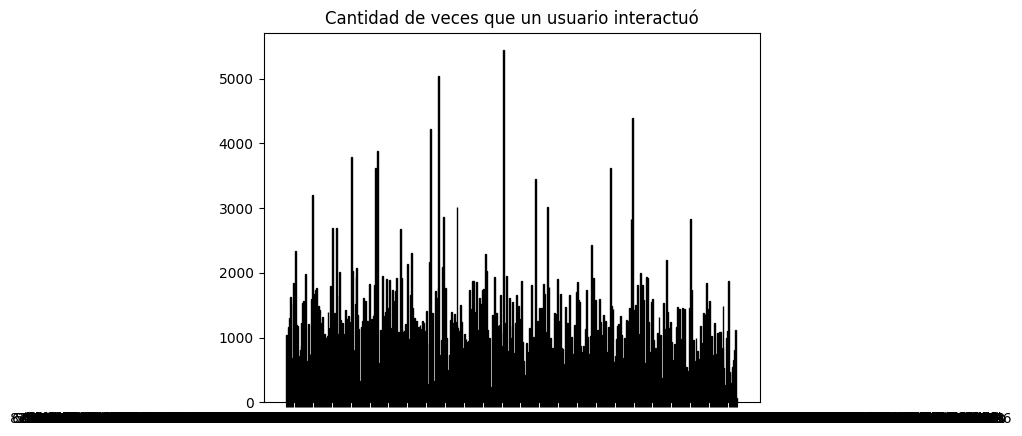

In [19]:
import matplotlib.pyplot as plt

plt.hist(logs_entrenamiento['username'], bins=500, edgecolor='black')  # 'bins' define el número de barras en el histograma

# Personaliza el título y las etiquetas de los ejes
plt.title('Cantidad de veces que un usuario interactuó')

# Muestra el histograma
plt.show()

In [ ]:
# Supongamos que tienes un DataFrame llamado 'notas' y deseas eliminar personas con un número de registros por debajo o por encima de ciertos porcentajes.
import pandas as pd

# Define los umbrales como porcentajes relativos al número total de registros
umbral_minimo_percent = 2  # Cambia este valor según tus necesidades
umbral_maximo_percent = 98  # Cambia este valor según tus necesidades

# Calcula el número mínimo y máximo de registros en función de estos porcentajes
total_registros = len(notas)
umbral_minimo = total_registros * umbral_minimo_percent / 100
umbral_maximo = total_registros * umbral_maximo_percent / 100

# Calcula el recuento de registros por persona
recuento_por_persona = notas['persona'].value_counts()

# Encuentra las personas que tienen un recuento de registros fuera de los umbrales
personas_a_eliminar = recuento_por_persona[(recuento_por_persona < umbral_minimo) | (recuento_por_persona > umbral_maximo)].index

# Filtra el DataFrame para eliminar las filas correspondientes
notas_filtradas = notas[~notas['persona'].isin(personas_a_eliminar)]


In [29]:

# Calcula el número mínimo y máximo de registros basados en el 5% más extremo
umbral_minimo = logs_entrenamiento['username'].value_counts().quantile(0.05)
umbral_maximo = logs_entrenamiento['username'].value_counts().quantile(0.95)

# Filtra el DataFrame para eliminar las filas correspondientes
logs_entrenamiento_filtrado = logs_entrenamiento[logs_entrenamiento.groupby('username')['username'].transform('count').between(umbral_minimo, umbral_maximo)]


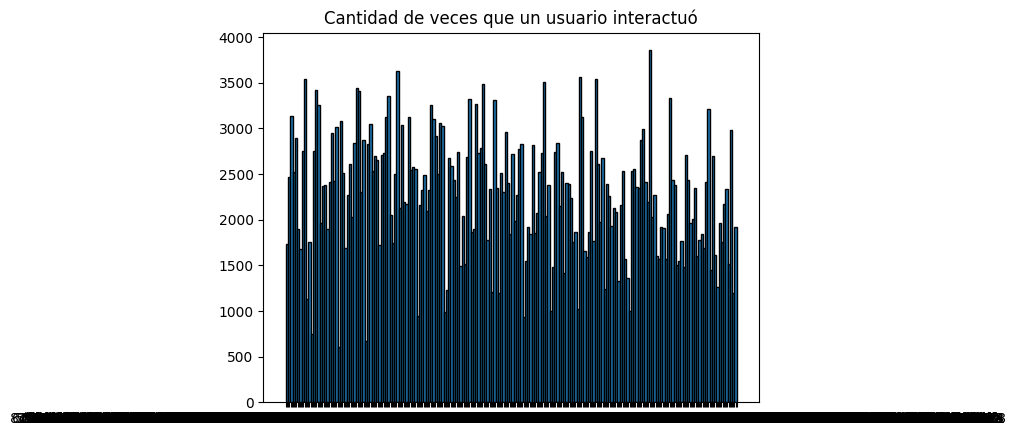

In [30]:
plt.hist(logs_entrenamiento_filtrado['username'], bins=200, edgecolor='black')  # 'bins' define el número de barras en el histograma

# Personaliza el título y las etiquetas de los ejes
plt.title('Cantidad de veces que un usuario interactuó')

# Muestra el histograma
plt.show()

In [ ]:
# Se puede ver que existe varianza en la cantidad de veces que una persona interactuó. Se decide eliminar outlayers.

In [10]:
# Obtener valores únicos de sequential
unique_values_sequential = logs_entrenamiento['sequential'].unique()
unique_values_chapter = logs_entrenamiento['chapter'].unique()
print(unique_values_sequential,unique_values_chapter)

['none_page' nan '0' '1' '2' '3' '4'] ['none_page' nan '2' '1' '4' '0' '3' '5' '6' '7']


Si bien se puede ver que existen NA's, un análisis visual de los datos mostraría que estos NA's están asociados a un tipo especial de evento en la plataforma de EOL, aquellos que son de edx.

# NOTA: REALIZAR UN ANÁLISIS DE CORRELACIÓN ENTRE UNO Y EL OTRO.
Por ejemplo, un script que cuente la cantidad de veces que un NAN está asociado a un event type que inicie con el string edx

In [ ]:
#CREAMOS UN DICCIONARIO CON PARA PODER GUARDAR A LOS USUARIOS CON NOMBRES MAS PEQUEÑOS


# Genera nombres de usuario acortados automáticamente
logs_entrenamiento['user_id'] = ['u' + str(i+1) for i in range(len(logs_entrenamiento))]

# Crea un diccionario para mapear nombres acortados a nombres largos
diccionario_mapeo = dict(zip(logs_entrenamiento['user_id'], logs_entrenamiento['username']))

logs_entrenamiento = logs_entrenamiento.drop('username', axis=1)

column_order = ['user_id'] + [col for col in logs_entrenamiento if col != 'user_id']
logs_entrenamiento = logs_entrenamiento[column_order]


#PARA ENCONTRAR A UN USUARIO SE USA LO SIGUIENTE
#nombre_acortado = 'u2'
#nombre_largo = diccionario_mapeo[nombre_acortado]

#print(f"Nombre largo correspondiente a '{nombre_acortado}': {nombre_largo}")